In [1]:

#Importamos las librerias que seran nuestras herramientas de procesamiento.
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import requests as rt
import statsmodels.api as sm                
import statsmodels.stats.api as sms 
import scipy.stats as stats



# Import librerias para análisis de cluster
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
import re#, wget, os
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import multiprocessing



# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import pandas as pd
from tabulate import tabulate
from tabulate import tabulate

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_blobs
from sklearn.metrics import euclidean_distances
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Ridge


# Varios
# ==============================================================================
import multiprocessing
import random
from itertools import product

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## **Importación de la base**

In [2]:
#Importamos la base de datos a nuestro entorno

# 1. Url que nos da Drive para compartir
url = 'https://drive.google.com/file/d/1VdP63KuqZULxvxbWD1zU31uc3amj95wZ/view?usp=sharing'

# 2. Tomamos el id de la url, mediante la funcion split
base = 'https://drive.google.com/uc?export=download&id=' + url.split('/')[-2]
df = base
datos = pd.read_csv(df)

In [3]:
df_base = pd.read_csv(base)

In [4]:
df_base

,id,antig,m2total,m2cub,ambientes,banios,direccion,barrio,comuna,latitud,longitud,precioUSD,m2precioUSD,comisaria_dista,obelisco_dista,nrobos,sup_espacio_verde,count_gastronomia,count_culturales
0,1,0,200,200,0,0,Gral Paz y Rivadavia,LINIERS,9,-34.639300,-58.528647,1500000,7500.000000,1162.621600,14053.797191,134,68426.445,12,0
1,2,30,50,50,0,1,Asuncion,VILLA DEVOTO,11,-34.611807,-58.528138,125000,2500.000000,1887.227055,13473.139375,23,110997.543,3,0
2,3,30,414,414,0,2,Avenida Beiro 5574,VILLA REAL,10,-34.616468,-58.528111,590000,1425.120773,1497.020434,13514.662463,33,115341.039,5,0
3,4,35,414,414,0,2,Avenida Beiro 5574,VILLA REAL,10,-34.616344,-58.527918,730000,1763.000000,1506.066814,13495.631683,33,115500.289,5,0
4,5,35,285,285,0,1,Avenida Beiro 5574,VILLA REAL,10,-34.616344,-58.527918,550000,1929.000000,1506.066814,13495.631683,33,115500.289,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3706,3707,0,92,92,0,1,Av. Cabildo al 2900,NU�EZ,13,-34.555678,-58.462734,625000,6793.000000,480.375592,9156.012812,82,20298.027,11,0
3707,3708,0,24,24,0,1,Moldes,NU�EZ,13,-34.554970,-58.466854,50000,2083.000000,513.625533,9510.464316,72,32727.682,5,0
3708,3709,0,77,77,0,1,Libertador al 6300,BELGRANO,13,-34.553865,-58.450116,1200000,15584.000000,565.138341,8373.449111,63,119063.024,16,1
3709,3710,0,71,71,0,0,Amen���+����+�bar 3330,NU�EZ,13,-34.552512,-58.468436,100000,1408.000000,485.604747,9786.001158,73,34057.670,6,0


##  **Análisis exploratorio y Limpieza de la base**

In [5]:
df_base.columns

Index(['id', 'antig', 'm2total', 'm2cub', 'ambientes', 'banios', 'direccion',
       'barrio', 'comuna', 'latitud', 'longitud', 'precioUSD', 'm2precioUSD',
       'comisaria_dista', 'obelisco_dista', 'nrobos', 'sup_espacio_verde',
       'count_gastronomia', 'count_culturales'],
      dtype='object')

In [6]:
df_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3711 entries, 0 to 3710
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 3711 non-null   int64  
 1   antig              3711 non-null   int64  
 2   m2total            3711 non-null   int64  
 3   m2cub              3711 non-null   int64  
 4   ambientes          3711 non-null   int64  
 5   banios             3711 non-null   int64  
 6   direccion          3707 non-null   object 
 7   barrio             3711 non-null   object 
 8   comuna             3711 non-null   int64  
 9   latitud            3711 non-null   float64
 10  longitud           3711 non-null   float64
 11  precioUSD          3711 non-null   int64  
 12  m2precioUSD        3711 non-null   float64
 13  comisaria_dista    3711 non-null   float64
 14  obelisco_dista     3711 non-null   float64
 15  nrobos             3711 non-null   int64  
 16  sup_espacio_verde  3711 

In [7]:
df_base.describe()

,id,antig,m2total,m2cub,ambientes,banios,comuna,latitud,longitud,precioUSD,m2precioUSD,comisaria_dista,obelisco_dista,nrobos,sup_espacio_verde,count_gastronomia,count_culturales
count,3711.000000,3711.000000,3711.000000,3711.000000,3711.000000,3711.000000,3711.000000,3711.000000,3711.000000,3.711000e+03,3711.000000,3711.000000,3711.000000,3711.000000,3711.000000,3711.000000,3711.000000
mean,1856.000000,14.045810,170.163029,157.668014,0.392886,1.138777,7.282134,-34.602917,-58.424922,4.199982e+05,3041.276822,687.923745,4787.447523,135.369712,80565.178971,40.021827,9.488278
std,1071.417752,21.731839,305.479189,305.640985,1.399959,1.298509,5.449637,0.022221,0.039282,6.216290e+05,2021.176619,372.091329,3457.615713,72.990312,81479.893509,47.551593,12.578286
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-34.694053,-58.528647,1.500000e+04,204.000000,19.198073,1.605225,2.000000,276.336000,0.000000,0.000000
25%,928.500000,0.000000,46.000000,40.000000,0.000000,0.000000,2.000000,-34.615422,-58.453078,1.300000e+05,1750.000000,422.736477,1878.550379,77.000000,26370.141500,8.000000,1.000000
50%,1856.000000,0.000000,100.000000,90.000000,0.000000,1.000000,6.000000,-34.601862,-58.421367,2.600000e+05,2500.000000,632.887670,4143.061854,131.000000,55826.199000,19.000000,5.000000
75%,2783.500000,30.000000,204.000000,190.000000,0.000000,2.000000,13.000000,-34.591262,-58.389804,4.900000e+05,3703.000000,922.017363,7218.496630,179.000000,117023.245000,62.000000,14.000000
max,3711.000000,102.000000,14400.000000,14400.000000,22.000000,30.000000,15.000000,-34.537166,-58.356972,1.600000e+07,25200.000000,2276.831339,14160.617746,442.000000,811740.562000,251.000000,92.000000


In [8]:
df_base_v2 = df_base

Primer Cuartil 130000.0
Tercer Cuartil 490000.0
Rango Intercuantil 360000.0
Mediana 260000.0
Valor Minimo 15000
Valor Maximo 16000000


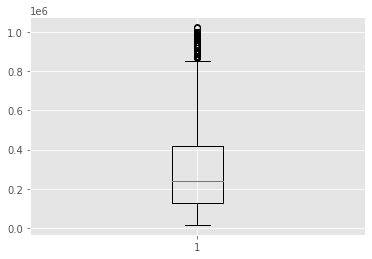

In [9]:
# Precio en Dolares


Q1 = df_base_v2['precioUSD'].quantile(0.25)
print('Primer Cuartil',Q1)
Q3 = df_base_v2['precioUSD'].quantile(0.75)
print('Tercer Cuartil',Q3)
IQR = Q3-Q1
print('Rango Intercuantil', IQR)
Mediana = df_base_v2['precioUSD'].median()
print('Mediana',Mediana)
Valor_Minimo = df_base_v2['precioUSD'].min()
print('Valor Minimo',Valor_Minimo)
Valor_Maximo = df_base_v2['precioUSD'].max()
print('Valor Maximo',Valor_Maximo)




#Calculamos valor de BI
BI_Calculado = (Q1- 1.5*IQR)
BS_Calculado = (Q3 + 1.5*IQR)





ubicacion_outliers = (df_base_v2['precioUSD'] < BI_Calculado) & (df_base_v2['precioUSD'] > BS_Calculado)


# Lista de outliers
outliers = df_base_v2[ubicacion_outliers]



ubicacion_sin_out = (df_base_v2['precioUSD'] >= BI_Calculado) & (df_base_v2['precioUSD'] <= BS_Calculado)
sin_outliers = df_base_v2[ubicacion_sin_out]
sin_outliers

#Precios de Venta en USD
plt.boxplot(sin_outliers['precioUSD']) 
  
plt.show() 

#Se visualiza mucho datos extremos. 

In [10]:
df_base_v2 = sin_outliers
df_base_v2.columns

Index(['id', 'antig', 'm2total', 'm2cub', 'ambientes', 'banios', 'direccion',
       'barrio', 'comuna', 'latitud', 'longitud', 'precioUSD', 'm2precioUSD',
       'comisaria_dista', 'obelisco_dista', 'nrobos', 'sup_espacio_verde',
       'count_gastronomia', 'count_culturales'],
      dtype='object')

In [11]:
df_base_v2 = df_base_v2.drop(['id', 'ambientes'], axis=1)

In [12]:
#Dividimos variables en categoricas y Numericas
categorical_variables = ['direccion', 'barrio', ]
numerical_variables =  ['antig', 'm2total', 'm2cub', 'banios', 'comuna', 'latitud', 'longitud', 'precioUSD', 'm2precioUSD',
       'comisaria_dista', 'obelisco_dista', 'nrobos', 'sup_espacio_verde',
       'count_gastronomia', 'count_culturales']

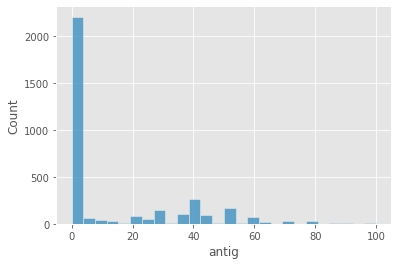

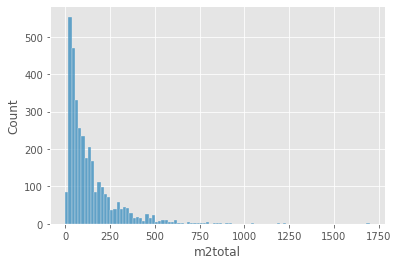

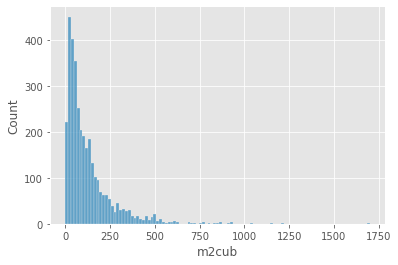

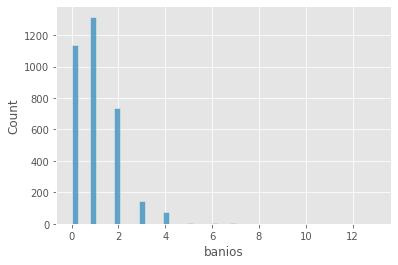

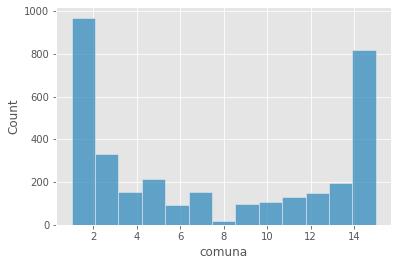

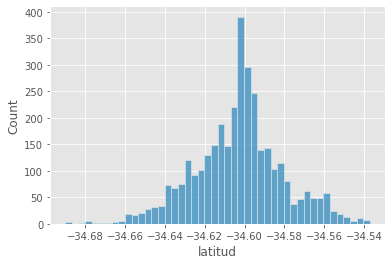

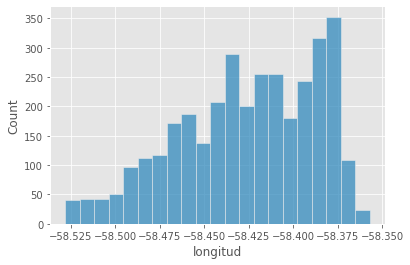

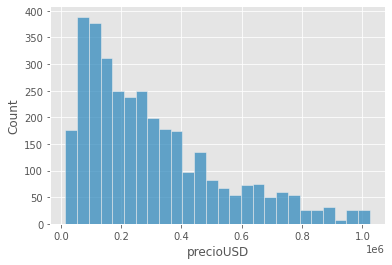

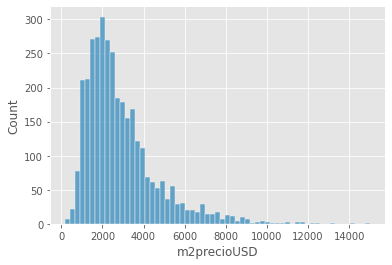

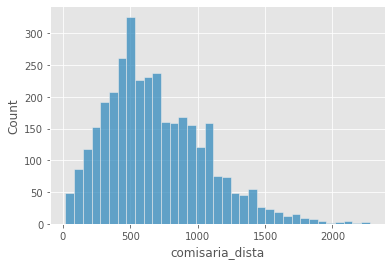

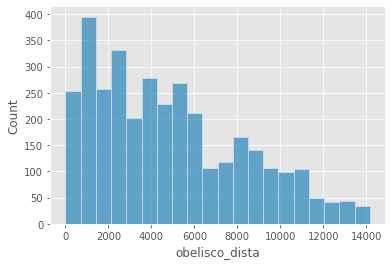

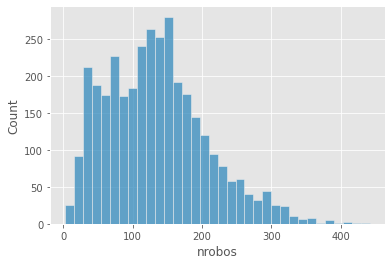

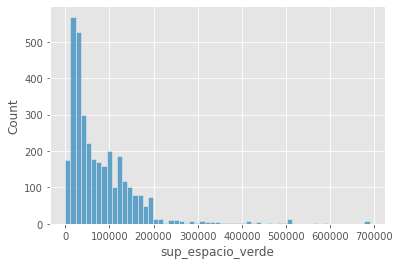

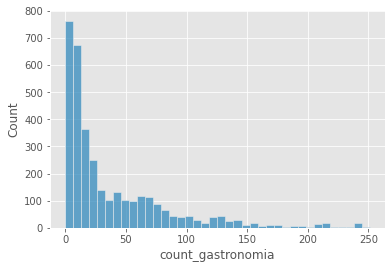

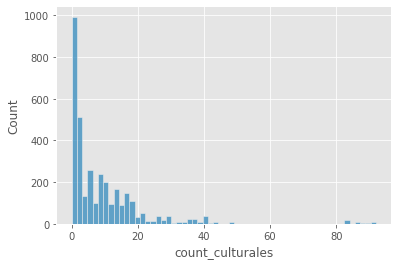

In [13]:
for num_variable in numerical_variables:
  sns.histplot(df_base_v2[num_variable], bins='auto')
  plt.show()

### Base sin outliers

In [14]:
datos_sin_outliers= df_base_v2

In [15]:
# Dimensiones del dataset
# ==============================================================================

datos_sin_outliers.select_dtypes(include=['object']).describe()

,direccion,barrio
count,3430,3434
unique,2552,48
top,Talcahuano al 300,PALERMO
freq,17,405


In [16]:
# Se convierte la variable chimenea tipo string
# ==============================================================================
#datos.ambientes = datos.ambientes.astype("str")
datos_sin_outliers.barrio = datos_sin_outliers.barrio.astype("str")


In [17]:
# Número de datos ausentes por variable
# ==============================================================================
datos_sin_outliers.isna().sum().sort_values()

antig                0
sup_espacio_verde    0
nrobos               0
obelisco_dista       0
comisaria_dista      0
m2precioUSD          0
precioUSD            0
count_gastronomia    0
longitud             0
comuna               0
barrio               0
banios               0
m2cub                0
m2total              0
latitud              0
count_culturales     0
direccion            4
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/dis

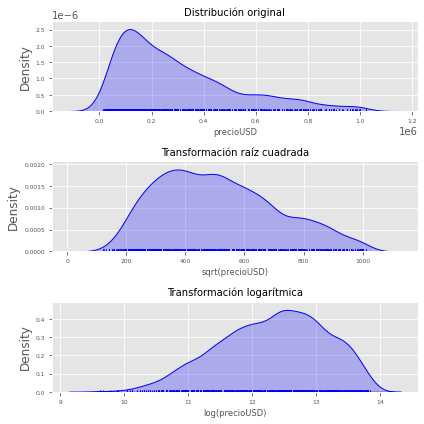

In [18]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6, 6))
sns.distplot(
    datos_sin_outliers.precioUSD,
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[0]
)
axes[0].set_title("Distribución original", fontsize = 'medium')
axes[0].set_xlabel('precioUSD', fontsize='small') 
axes[0].tick_params(labelsize = 6)

sns.distplot(
    np.sqrt(datos_sin_outliers.precioUSD),
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[1]
)
axes[1].set_title("Transformación raíz cuadrada", fontsize = 'medium')
axes[1].set_xlabel('sqrt(precioUSD)', fontsize='small') 
axes[1].tick_params(labelsize = 6)

sns.distplot(
    np.log(datos_sin_outliers.precioUSD),
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[2]
)
axes[2].set_title("Transformación logarítmica", fontsize = 'medium')
axes[2].set_xlabel('log(precioUSD)', fontsize='small') 
axes[2].tick_params(labelsize = 6)

fig.tight_layout()

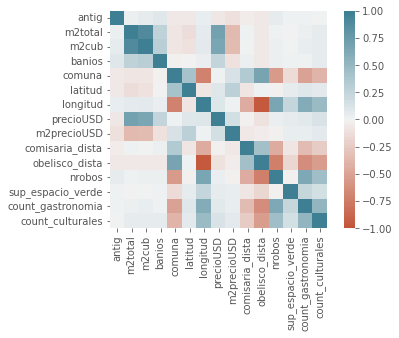

In [19]:
corr = datos_sin_outliers.corr()
sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20,220, n=200), square=True)
plt.show()

In [20]:
import scipy.stats as st

#Precios en Dolares
st.t.interval(0.95,len(datos_sin_outliers['precioUSD'])-1, loc=np.mean(datos_sin_outliers['precioUSD']), scale=st.sem(datos_sin_outliers['precioUSD']))

(294035.97779275454, 309165.8113743975)

In [21]:
#Precios en dolares por M2
st.t.interval(0.95,len(datos_sin_outliers['m2precioUSD'])-1, loc=np.mean(datos_sin_outliers['m2precioUSD']), scale=st.sem(datos_sin_outliers['m2precioUSD']))

(2847.8776784495835, 2964.950628494505)

### Base con outliers

In [22]:
datos = df_base

In [23]:
# Dimensiones del dataset
# ==============================================================================

datos.select_dtypes(include=['object']).describe()

,direccion,barrio
count,3707,3711
unique,2753,48
top,Talcahuano al 300,PALERMO
freq,17,438


In [24]:

datos.ambientes = datos.ambientes.astype("str")
datos.barrio = datos.barrio.astype("str")


In [25]:
# Número de datos ausentes por variable
# ==============================================================================
datos.isna().sum().sort_values()

id                   0
sup_espacio_verde    0
nrobos               0
obelisco_dista       0
comisaria_dista      0
m2precioUSD          0
precioUSD            0
longitud             0
count_gastronomia    0
latitud              0
barrio               0
banios               0
ambientes            0
m2cub                0
m2total              0
antig                0
comuna               0
count_culturales     0
direccion            4
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/dis

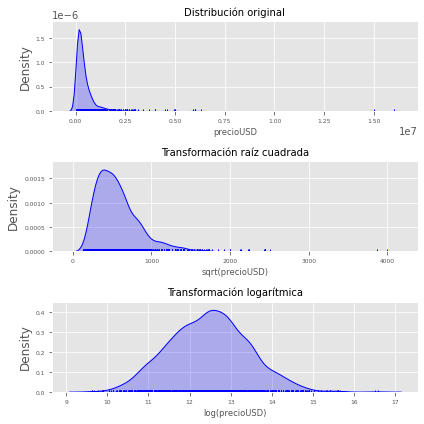

In [26]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6, 6))
sns.distplot(
    datos.precioUSD,
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[0]
)
axes[0].set_title("Distribución original", fontsize = 'medium')
axes[0].set_xlabel('precioUSD', fontsize='small') 
axes[0].tick_params(labelsize = 6)

sns.distplot(
    np.sqrt(datos.precioUSD),
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[1]
)
axes[1].set_title("Transformación raíz cuadrada", fontsize = 'medium')
axes[1].set_xlabel('sqrt(precioUSD)', fontsize='small') 
axes[1].tick_params(labelsize = 6)

sns.distplot(
    np.log(datos.precioUSD),
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[2]
)
axes[2].set_title("Transformación logarítmica", fontsize = 'medium')
axes[2].set_xlabel('log(precioUSD)', fontsize='small') 
axes[2].tick_params(labelsize = 6)

fig.tight_layout()

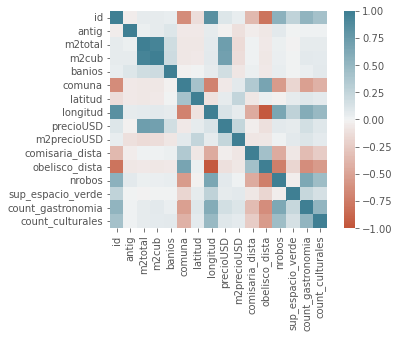

In [27]:
corr = datos.corr()
sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20,220, n=200), square=True)
plt.show()

In [28]:
import scipy.stats as st

#Precios en Dolares
st.t.interval(0.95,len(datos['precioUSD'])-1, loc=np.mean(datos['precioUSD']), scale=st.sem(datos['precioUSD']))

(399991.45293881965, 440004.86772946385)

In [29]:
#Precios en dolares por M2
st.t.interval(0.95,len(datos['m2precioUSD'])-1, loc=np.mean(datos['m2precioUSD']), scale=st.sem(datos['m2precioUSD']))

(2976.226629270523, 3106.327014766123)

### Conclusión


In [30]:
datos.describe()

,id,antig,m2total,m2cub,banios,comuna,latitud,longitud,precioUSD,m2precioUSD,comisaria_dista,obelisco_dista,nrobos,sup_espacio_verde,count_gastronomia,count_culturales
count,3711.000000,3711.000000,3711.000000,3711.000000,3711.000000,3711.000000,3711.000000,3711.000000,3.711000e+03,3711.000000,3711.000000,3711.000000,3711.000000,3711.000000,3711.000000,3711.000000
mean,1856.000000,14.045810,170.163029,157.668014,1.138777,7.282134,-34.602917,-58.424922,4.199982e+05,3041.276822,687.923745,4787.447523,135.369712,80565.178971,40.021827,9.488278
std,1071.417752,21.731839,305.479189,305.640985,1.298509,5.449637,0.022221,0.039282,6.216290e+05,2021.176619,372.091329,3457.615713,72.990312,81479.893509,47.551593,12.578286
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-34.694053,-58.528647,1.500000e+04,204.000000,19.198073,1.605225,2.000000,276.336000,0.000000,0.000000
25%,928.500000,0.000000,46.000000,40.000000,0.000000,2.000000,-34.615422,-58.453078,1.300000e+05,1750.000000,422.736477,1878.550379,77.000000,26370.141500,8.000000,1.000000
50%,1856.000000,0.000000,100.000000,90.000000,1.000000,6.000000,-34.601862,-58.421367,2.600000e+05,2500.000000,632.887670,4143.061854,131.000000,55826.199000,19.000000,5.000000
75%,2783.500000,30.000000,204.000000,190.000000,2.000000,13.000000,-34.591262,-58.389804,4.900000e+05,3703.000000,922.017363,7218.496630,179.000000,117023.245000,62.000000,14.000000
max,3711.000000,102.000000,14400.000000,14400.000000,30.000000,15.000000,-34.537166,-58.356972,1.600000e+07,25200.000000,2276.831339,14160.617746,442.000000,811740.562000,251.000000,92.000000


In [31]:
datos_sin_outliers.describe()

,antig,m2total,m2cub,banios,comuna,latitud,longitud,precioUSD,m2precioUSD,comisaria_dista,obelisco_dista,nrobos,sup_espacio_verde,count_gastronomia,count_culturales
count,3434.000000,3434.000000,3434.000000,3434.000000,3434.000000,3434.000000,3434.000000,3.434000e+03,3434.000000,3434.000000,3434.000000,3434.000000,3434.000000,3434.000000,3434.000000
mean,13.967385,136.348573,124.946127,1.073384,7.356144,-34.603137,-58.426010,3.016009e+05,2906.414153,688.505995,4878.917943,134.181130,79360.054102,38.111823,9.215201
std,21.336992,139.086640,133.355331,1.086622,5.403590,0.022431,0.039151,2.261013e+05,1749.546446,374.667709,3449.560186,72.534005,79338.116909,46.027630,12.606412
min,0.000000,0.000000,0.000000,0.000000,1.000000,-34.689843,-58.528138,1.500000e+04,204.000000,19.198073,1.605225,3.000000,276.336000,0.000000,0.000000
25%,0.000000,44.000000,40.000000,0.000000,2.000000,-34.616109,-58.455659,1.250000e+05,1714.000000,422.719652,1982.704125,77.000000,26310.121250,7.000000,1.000000
50%,0.000000,90.000000,82.000000,1.000000,6.000000,-34.601867,-58.421770,2.400000e+05,2452.000000,632.239607,4256.383626,130.000000,55303.622000,18.000000,5.000000
75%,30.000000,180.000000,160.000000,2.000000,13.000000,-34.590759,-58.391558,4.200000e+05,3571.000000,922.655354,7404.823716,176.000000,115762.991000,57.000000,13.000000
max,100.000000,1700.000000,1700.000000,13.000000,15.000000,-34.537166,-58.356972,1.024500e+06,15000.000000,2276.831339,14160.617746,442.000000,689318.861000,251.000000,92.000000


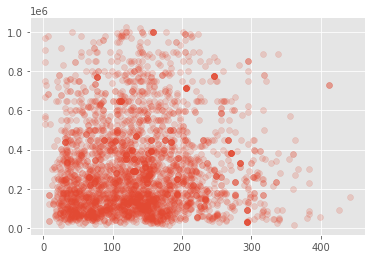

In [32]:
x_scat = np.array(datos_sin_outliers.nrobos)
Y_scat = np.array(datos_sin_outliers.precioUSD)
plt.scatter(x_scat,Y_scat, alpha=0.2)
plt.show()
# Claramente al ser una zona más segura su valor mejor.

### Siguiendo

In [33]:
df_base.columns

Index(['id', 'antig', 'm2total', 'm2cub', 'ambientes', 'banios', 'direccion',
       'barrio', 'comuna', 'latitud', 'longitud', 'precioUSD', 'm2precioUSD',
       'comisaria_dista', 'obelisco_dista', 'nrobos', 'sup_espacio_verde',
       'count_gastronomia', 'count_culturales'],
      dtype='object')

In [34]:
## despreciamos ambientes ya que la mayoria son monoambientes

datos = df_base[[ 'antig', 'm2total', 'm2cub', 'banios','ambientes',
       'comuna', 'm2precioUSD','barrio', 'precioUSD',
       'comisaria_dista', 'obelisco_dista', 'nrobos', 'sup_espacio_verde',
       'count_gastronomia', 'count_culturales']]
# Variables numéricas
# ==============================================================================
datos.select_dtypes(include=['float64', 'int']).describe()

,antig,m2total,m2cub,banios,comuna,m2precioUSD,precioUSD,comisaria_dista,obelisco_dista,nrobos,sup_espacio_verde,count_gastronomia,count_culturales
count,3711.000000,3711.000000,3711.000000,3711.000000,3711.000000,3711.000000,3.711000e+03,3711.000000,3711.000000,3711.000000,3711.000000,3711.000000,3711.000000
mean,14.045810,170.163029,157.668014,1.138777,7.282134,3041.276822,4.199982e+05,687.923745,4787.447523,135.369712,80565.178971,40.021827,9.488278
std,21.731839,305.479189,305.640985,1.298509,5.449637,2021.176619,6.216290e+05,372.091329,3457.615713,72.990312,81479.893509,47.551593,12.578286
min,0.000000,0.000000,0.000000,0.000000,1.000000,204.000000,1.500000e+04,19.198073,1.605225,2.000000,276.336000,0.000000,0.000000
25%,0.000000,46.000000,40.000000,0.000000,2.000000,1750.000000,1.300000e+05,422.736477,1878.550379,77.000000,26370.141500,8.000000,1.000000
50%,0.000000,100.000000,90.000000,1.000000,6.000000,2500.000000,2.600000e+05,632.887670,4143.061854,131.000000,55826.199000,19.000000,5.000000
75%,30.000000,204.000000,190.000000,2.000000,13.000000,3703.000000,4.900000e+05,922.017363,7218.496630,179.000000,117023.245000,62.000000,14.000000
max,102.000000,14400.000000,14400.000000,30.000000,15.000000,25200.000000,1.600000e+07,2276.831339,14160.617746,442.000000,811740.562000,251.000000,92.000000


In [35]:
datos

,antig,m2total,m2cub,banios,ambientes,comuna,m2precioUSD,barrio,precioUSD,comisaria_dista,obelisco_dista,nrobos,sup_espacio_verde,count_gastronomia,count_culturales
0,0,200,200,0,0,9,7500.000000,LINIERS,1500000,1162.621600,14053.797191,134,68426.445,12,0
1,30,50,50,1,0,11,2500.000000,VILLA DEVOTO,125000,1887.227055,13473.139375,23,110997.543,3,0
2,30,414,414,2,0,10,1425.120773,VILLA REAL,590000,1497.020434,13514.662463,33,115341.039,5,0
3,35,414,414,2,0,10,1763.000000,VILLA REAL,730000,1506.066814,13495.631683,33,115500.289,5,0
4,35,285,285,1,0,10,1929.000000,VILLA REAL,550000,1506.066814,13495.631683,33,115500.289,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3706,0,92,92,1,0,13,6793.000000,NU�EZ,625000,480.375592,9156.012812,82,20298.027,11,0
3707,0,24,24,1,0,13,2083.000000,NU�EZ,50000,513.625533,9510.464316,72,32727.682,5,0
3708,0,77,77,1,0,13,15584.000000,BELGRANO,1200000,565.138341,8373.449111,63,119063.024,16,1
3709,0,71,71,0,0,13,1408.000000,NU�EZ,100000,485.604747,9786.001158,73,34057.670,6,0


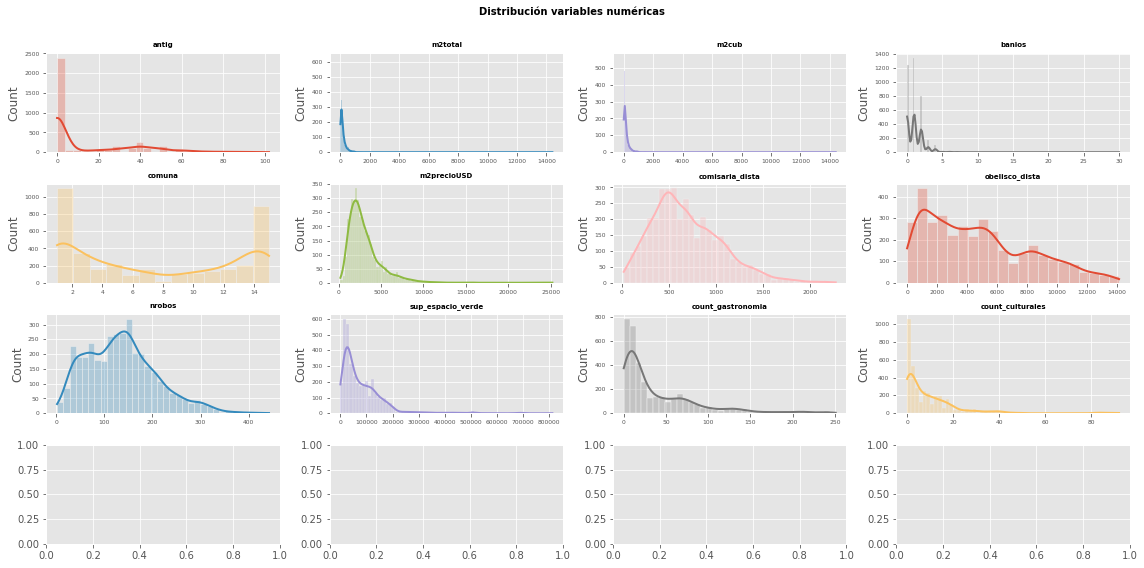

In [36]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(16, 8))
axes = axes.flat
columnas_numeric = datos.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('precioUSD')

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = datos,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

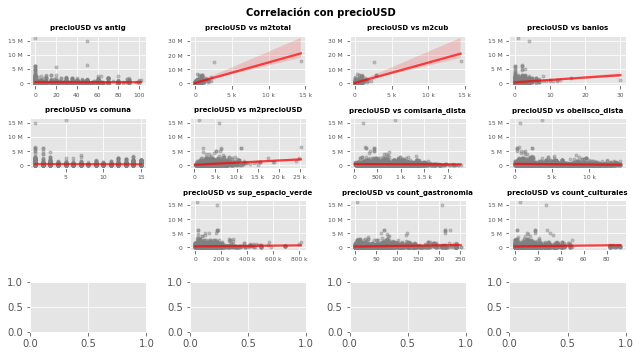

In [37]:


# Gráfico de distribución para cada variable numérica
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(9, 5))
axes = axes.flat
columnas_numeric = datos.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('precioUSD')

for i, colum in enumerate(columnas_numeric):
    sns.regplot(
        x           = datos[colum],
        y           = datos['precioUSD'],
        color       = "gray",
        marker      = '.',
        scatter_kws = {"alpha":0.4},
        line_kws    = {"color":"r","alpha":0.7},
        ax          = axes[i]
    )
    axes[i].set_title(f"precioUSD vs {colum}", fontsize = 7, fontweight = "bold")
    #axes[i].ticklabel_format(style='sci', scilimits=(-4,4), axis='both')
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].xaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Se eliminan los axes vacíos
for i in [8]:
    fig.delaxes(axes[i])
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Correlación con precioUSD', fontsize = 10, fontweight = "bold");



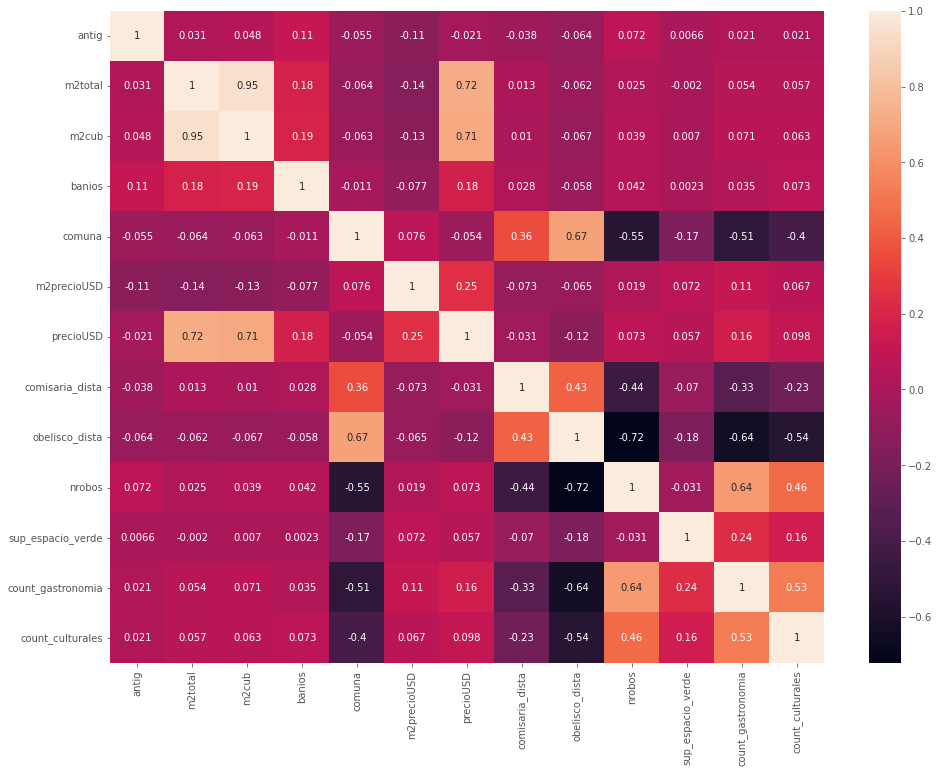

In [38]:
corr_df = datos.corr(method='pearson')

plt.figure(figsize=(16, 12))
sns.heatmap(corr_df, annot=True)
plt.show()

In [39]:
# Variables cualitativas (tipo object)
# ==============================================================================
datos.select_dtypes(include=['object']).describe()



,ambientes,barrio
count,3711,3711
unique,18,48
top,0,PALERMO
freq,3081,438


In [40]:
dic_replace = {'10': "10_mas",
               '11': "10_mas",
               '13': "10_mas",
               '15': "10_mas",
               '16': "10_mas",
               '18': "10_mas",
               '20': "10_mas",
               '22': "10_mas"}


datos['ambientes'] = datos['ambientes'] \
                     .map(dic_replace) \
                     .fillna(datos['ambientes'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


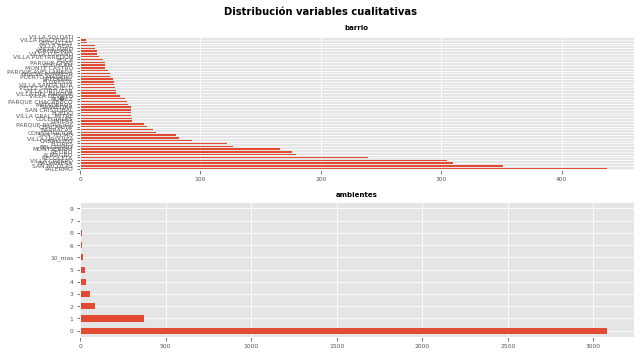

In [41]:

# Gráfico para cada variable cualitativa
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(9, 5))
axes = axes.flat
columnas_object = datos[['barrio','ambientes']]

for i, colum in enumerate(columnas_object):
    datos[colum].value_counts().plot.barh(ax = axes[i])
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")

# Se eliminan los axes vacíos

    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribución variables cualitativas',
             fontsize = 10, fontweight = "bold");




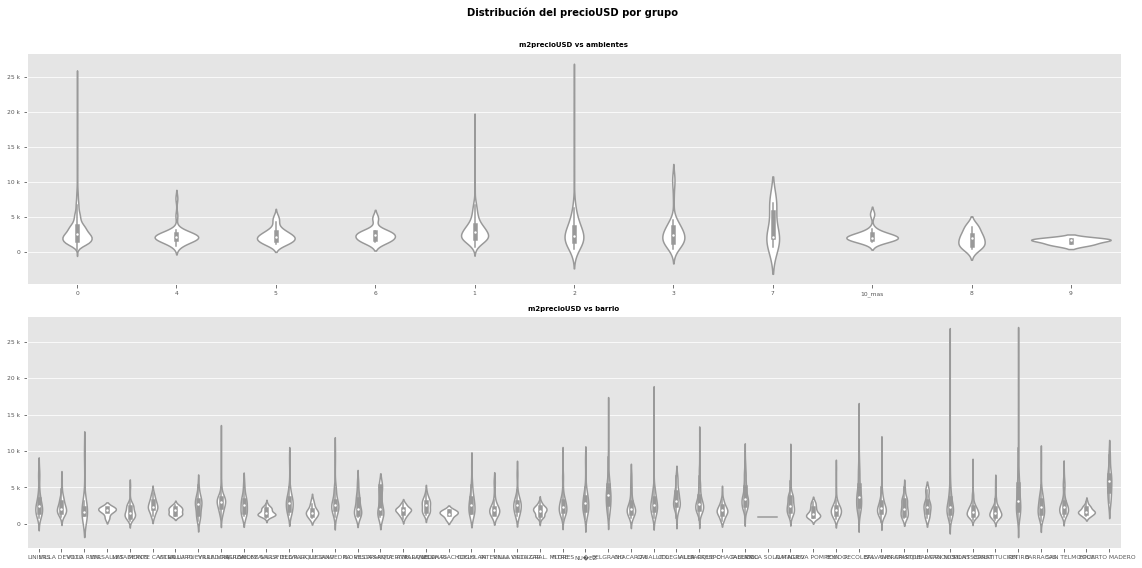

In [42]:

# Gráfico de distribución para cada variable numérica


# Gráfico relación entre el precio y cada cada variables cualitativas
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(16, 8))
axes = axes.flat
columnas_object = datos.select_dtypes(include=['object']).columns

for i, colum in enumerate(columnas_object):
    sns.violinplot(
        x     = colum,
        y     = 'm2precioUSD',
        data  = datos,
        color = "white",
        ax    = axes[i]
    )
    axes[i].set_title(f"m2precioUSD vs {colum}", fontsize = 7, fontweight = "bold")
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Se eliminan los axes vacíos

    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribución del precioUSD por grupo', fontsize = 10, fontweight = "bold");


## **Desarrollo y entrenamiento del modelo.**

In [43]:

# Reparto de datos en train y test
# ==============================================================================
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
                                        datos.drop('precioUSD', axis = 'columns'),
                                        datos['precioUSD'],
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )


#Defino las variables Y y X para la regresion
Y = datos[["precioUSD"]]
X = datos[['antig', 'm2total', 'm2cub', 'banios',
       'comuna', 'm2precioUSD',
       'comisaria_dista', 'obelisco_dista', 'nrobos', 'sup_espacio_verde',
       'count_gastronomia', 'count_culturales']]


MiModelo = sm.OLS(Y, sm.add_constant(X))  
Resultados = MiModelo.fit()               
print(Resultados.summary())


                            OLS Regression Results                            
Dep. Variable:              precioUSD   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     591.3
Date:                Sat, 29 Jan 2022   Prob (F-statistic):               0.00
Time:                        18:52:14   Log-Likelihood:                -52783.
No. Observations:                3711   AIC:                         1.056e+05
Df Residuals:                    3698   BIC:                         1.057e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -2.548e+05   3.68e+0

In [44]:
## Repetimos con regresion robusta quitando las variables menos significativas
Y2 = datos[["precioUSD"]]
X2 = datos[['antig', 'm2total', 'm2cub', 'banios', 'm2precioUSD',
           'sup_espacio_verde', 'count_gastronomia', 'count_culturales']]


RegRobusta = sm.OLS(Y2, sm.add_constant(X2))  
Resultado2 = RegRobusta.fit()
Resultados_robustos = Resultados.get_robustcov_results()
print(Resultados_robustos.summary())

                            OLS Regression Results                            
Dep. Variable:              precioUSD   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     51.95
Date:                Sat, 29 Jan 2022   Prob (F-statistic):          9.34e-116
Time:                        18:52:14   Log-Likelihood:                -52783.
No. Observations:                3711   AIC:                         1.056e+05
Df Residuals:                    3698   BIC:                         1.057e+05
Df Model:                          12                                         
Covariance Type:                  HC1                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -2.548e+05   6.77e+0

In [45]:


print("Partición de entrenamento")
print("-----------------------")
print(y_train.describe())



Partición de entrenamento
-----------------------
count    2.968000e+03
mean     4.230410e+05
std      6.347570e+05
min      1.500000e+04
25%      1.300000e+05
50%      2.600000e+05
75%      5.000000e+05
max      1.600000e+07
Name: precioUSD, dtype: float64


In [46]:


print("Partición de test")
print("-----------------------")
print(y_test.describe())



Partición de test
-----------------------
count    7.430000e+02
mean     4.078431e+05
std      5.663972e+05
min      2.000000e+04
25%      1.300000e+05
50%      2.600000e+05
75%      4.500000e+05
max      6.000000e+06
Name: precioUSD, dtype: float64


In [47]:
# Selección de las variables por típo
# ==============================================================================
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_selector

# Se estandarizan las columnas numéricas y se hace one-hot-encoding de las 
# columnas cualitativas. Para mantener las columnas a las que no se les aplica 
# ninguna transformación se tiene que indicar remainder='passthrough'.
numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()

preprocessor = ColumnTransformer(
                   [('scale', StandardScaler(), numeric_cols),
                    ('onehot', OneHotEncoder(handle_unknown='ignore'), cat_cols)],
                remainder='passthrough')


In [48]:
X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep  = preprocessor.transform(X_test)


In [49]:
# Selección de las variables por típo
# ==============================================================================
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_selector

numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()

# Transformaciones para las variables numéricas
numeric_transformer = Pipeline(
                        steps=[
                            ('imputer', SimpleImputer(strategy='median')),
                            ('scaler', StandardScaler())
                        ]
                      )


# Transformaciones para las variables categóricas
categorical_transformer = Pipeline(
                            steps=[
                                ('imputer', SimpleImputer(strategy='most_frequent')),
                                ('onehot', OneHotEncoder(handle_unknown='ignore'))
                            ]
                          )

preprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, numeric_cols),
                        ('cat', categorical_transformer, cat_cols)
                    ],
                    remainder='passthrough'
                )


In [50]:


X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep  = preprocessor.transform(X_test)



In [51]:
from sklearn.linear_model import Ridge

# Preprocedado
# ==============================================================================

# Identificación de columnas numéricas y categóricas
numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()


# Transformaciones para las variables numéricas
numeric_transformer = Pipeline(
                        steps=[('scaler', StandardScaler())]
                      )

# Transformaciones para las variables categóricas
categorical_transformer = Pipeline(
                            steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))]
                          )

preprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, numeric_cols),
                        ('cat', categorical_transformer, cat_cols)
                    ],
                    remainder='passthrough'
                )

# Pipeline
# ==============================================================================

# Se combinan los pasos de preprocesado y el modelo en un mismo pipeline
pipe = Pipeline([('preprocessing', preprocessor),
                 ('modelo', Ridge())])

# Train
# ==============================================================================
# Se asigna el resultado a _ para que no se imprima por pantalla
_ = pipe.fit(X=X_train, y=y_train)

In [52]:


# Validación cruzada
# ==============================================================================
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(
                estimator = pipe,
                X         = X_train,
                y         = y_train,
                scoring   = 'neg_root_mean_squared_error',
                cv        = 5
             )

print(f"Métricas validación cruzada: {cv_scores}")
print(f"Média métricas de validación cruzada: {cv_scores.mean()}")



Métricas validación cruzada: [-328254.73385188 -869807.18701119 -298594.0457566  -298757.5714633
 -552825.48034856]
Média métricas de validación cruzada: -469647.80368630466


In [53]:
# Validación cruzada repetida
# ==============================================================================
from sklearn.model_selection import RepeatedKFold

cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=123)
cv_scores = cross_val_score(
                estimator = pipe,
                X         = X_train,
                y         = y_train,
                scoring   = 'neg_root_mean_squared_error',
                cv        = cv
             )

print(f"Métricas de validación cruzada: {cv_scores}")
print("")
print(f"Média métricas de validación cruzada: {cv_scores.mean()}")

Métricas de validación cruzada: [-266829.09040559 -556522.485184   -297979.95658314 -284514.00299049
 -762163.87200348 -300249.92347415 -284437.29535407 -707287.39810614
 -269489.96325336 -348168.84791431 -337604.01777923 -770856.96102195
 -255238.50214163 -517952.63647228 -358262.36885365 -353814.86477115
 -269200.55273903 -259371.03898151 -587254.58244965 -782160.48185309
 -526954.45817018 -350179.5664934  -263454.67000319 -842249.88276798
 -296073.39704525]

Média métricas de validación cruzada: -433930.8326724762


In [54]:
# Validación cruzada repetida
# ==============================================================================
from sklearn.model_selection import RepeatedKFold

cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=123)
cv_scores = cross_val_score(
                estimator = pipe,
                X         = X_train,
                y         = y_train,
                scoring   = 'neg_root_mean_squared_error',
                cv        = cv
             )

print(f"Métricas de validación cruzada: {cv_scores}")
print("")
print(f"Média métricas de validación cruzada: {cv_scores.mean()}")

Métricas de validación cruzada: [-266829.09040559 -556522.485184   -297979.95658314 -284514.00299049
 -762163.87200348 -300249.92347415 -284437.29535407 -707287.39810614
 -269489.96325336 -348168.84791431 -337604.01777923 -770856.96102195
 -255238.50214163 -517952.63647228 -358262.36885365 -353814.86477115
 -269200.55273903 -259371.03898151 -587254.58244965 -782160.48185309
 -526954.45817018 -350179.5664934  -263454.67000319 -842249.88276798
 -296073.39704525]

Média métricas de validación cruzada: -433930.8326724762


In [55]:

# Validación cruzada repetida con múltiples métricas
# ==============================================================================
from sklearn.model_selection import cross_validate

cv = RepeatedKFold(n_splits=3, n_repeats=5, random_state=123)
cv_scores = cross_validate(
                estimator = pipe,
                X         = X_train,
                y         = y_train,
                scoring   = ('r2', 'neg_root_mean_squared_error'),
                cv        = cv,
                return_train_score = True
            )

# Se convierte el diccionario a dataframe para facilitar la visualización
cv_scores = pd.DataFrame(cv_scores)
cv_scores


,fit_time,score_time,test_r2,train_r2,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error
0,0.018178,0.006361,0.600804,0.680645,-285974.588580,-400227.499262
1,0.016327,0.013397,0.519053,0.746384,-457838.325084,-312968.658925
2,0.018857,0.006216,0.372163,0.647428,-596495.888864,-336060.322797
3,0.017252,0.006513,0.632440,0.675903,-278679.408010,-401776.634196
4,0.016460,0.006239,0.548900,0.689943,-572139.444562,-273300.523098
5,0.016593,0.006372,0.636602,0.679430,-313329.587410,-387770.181096
6,0.017115,0.006199,0.611034,0.686453,-344303.948138,-376390.696553
7,0.016130,0.006708,0.423603,0.696923,-601288.060848,-296762.751513
8,0.016800,0.006325,0.609549,0.682190,-328462.591886,-384808.715673
9,0.016250,0.006314,0.531908,0.691008,-324886.640584,-389632.076634


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


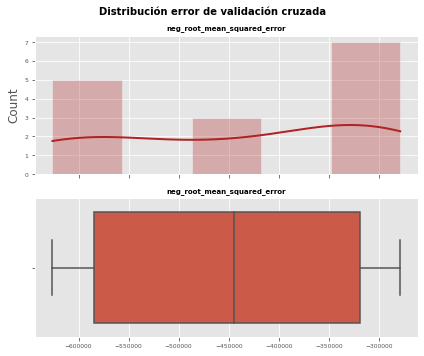

In [56]:
# Distribución del error de validación cruzada
# ==============================================================================
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(6, 5), sharex=True)

sns.histplot(
    data    = cv_scores['test_neg_root_mean_squared_error'],
    stat    = "count",
    kde     = True,
    line_kws= {'linewidth': 2},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[0]
)

axes[0].set_title('neg_root_mean_squared_error', fontsize = 7, fontweight = "bold")
axes[0].tick_params(labelsize = 6)
axes[0].set_xlabel("")
    
sns.boxplot(
    cv_scores['test_neg_root_mean_squared_error'],
    ax      = axes[1]
)
axes[1].set_title('neg_root_mean_squared_error', fontsize = 7, fontweight = "bold")
axes[1].tick_params(labelsize = 6)
axes[1].set_xlabel("")


fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribución error de validación cruzada', fontsize = 10,
             fontweight = "bold");

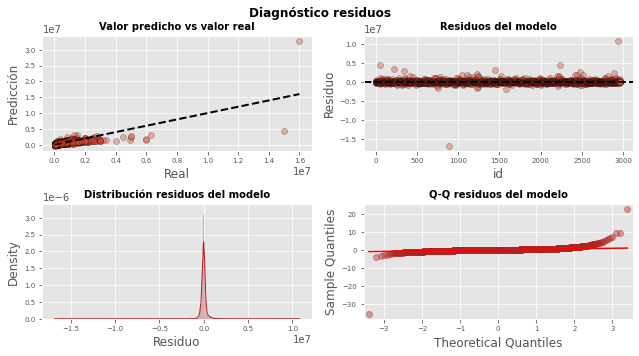

In [57]:
# Diagnóstico errores (residuos) de las predicciones de validación cruzada
# ==============================================================================
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
import statsmodels.api as sm

# Validación cruzada
# ==============================================================================
cv = KFold(n_splits=5, random_state=123, shuffle=True)
cv_prediccones = cross_val_predict(
                    estimator = pipe,
                    X         = X_train,
                    y         = y_train,
                    cv        = cv
                  )

# Gráficos
# ==============================================================================
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(9, 5))

axes[0, 0].scatter(y_train, cv_prediccones, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
                'k--', color = 'black', lw=2)
axes[0, 0].set_title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Predicción')
axes[0, 0].tick_params(labelsize = 7)

axes[0, 1].scatter(list(range(len(y_train))), y_train - cv_prediccones,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 1].set_title('Residuos del modelo', fontsize = 10, fontweight = "bold")
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Residuo')
axes[0, 1].tick_params(labelsize = 7)

sns.histplot(
    data    = y_train - cv_prediccones,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[1, 0]
)

axes[1, 0].set_title('Distribución residuos del modelo', fontsize = 10,
                     fontweight = "bold")
axes[1, 0].set_xlabel("Residuo")
axes[1, 0].tick_params(labelsize = 7)


sm.qqplot(
    y_train - cv_prediccones,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 1], 
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)
axes[1, 1].set_title('Q-Q residuos del modelo', fontsize = 10, fontweight = "bold")
axes[1, 1].tick_params(labelsize = 7)

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnóstico residuos', fontsize = 12, fontweight = "bold");



In [58]:


# Validación cruzada repetida paralelizada (multicore)
# ==============================================================================
from sklearn.model_selection import RepeatedKFold

cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=123)
cv_scores = cross_val_score(
                estimator = pipe,
                X         = X_train,
                y         = y_train,
                scoring   = 'neg_root_mean_squared_error',
                cv        = cv,
                n_jobs    = -1 # todos los cores disponibles
             )

print(f"Média métricas de validación cruzada: {cv_scores.mean()}")

Média métricas de validación cruzada: -410930.9378687383


In [59]:
predicciones = pipe.predict(X_test)

In [60]:


# Se crea un dataframe con las predicciones y el valor real
df_predicciones = pd.DataFrame({'precio' : y_test, 'prediccion' : predicciones})
df_predicciones.tail(10)


,precio,prediccion
455,215000,285799.460204
224,75000,101131.457421
3094,715000,526659.348888
1726,80000,53747.031481
1144,1111111,878930.711861
204,248000,213437.295494
3702,850000,931451.591545
1225,120000,233246.916731
3417,500000,632450.736693
3011,90000,52767.171311


In [61]:
datos.loc[224]

antig                                0
m2total                             36
m2cub                               36
banios                               1
ambientes                            0
comuna                               9
m2precioUSD                       2083
barrio               PARQUE AVELLANEDA
precioUSD                        75000
comisaria_dista                1352.56
obelisco_dista                 10969.1
nrobos                              24
sup_espacio_verde               159291
count_gastronomia                    3
count_culturales                     0
Name: 224, dtype: object

In [62]:
datos.loc[204]

antig                            0
m2total                        106
m2cub                          106
banios                           0
ambientes                        0
comuna                          12
m2precioUSD                2339.62
barrio               VILLA URQUIZA
precioUSD                   248000
comisaria_dista            944.319
obelisco_dista             11122.1
nrobos                          49
sup_espacio_verde           340688
count_gastronomia                1
count_culturales                 0
Name: 204, dtype: object

In [63]:


# neg_root_mean_squared_error de test
# ==============================================================================
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(
        y_true = y_test,
        y_pred = predicciones,
        squared = False
       )
rmse

341757.8256965536

In [64]:
from sklearn.model_selection import GridSearchCV, RepeatedKFold
from sklearn.linear_model import Ridge

# Pipe: preprocesado + modelo
# ==============================================================================
# Identificación de columnas numéricas y catégoricas
numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()


# Transformaciones para las variables numéricas
numeric_transformer = Pipeline(
                        steps=[('scaler', StandardScaler())]
                      )

# Transformaciones para las variables categóricas
categorical_transformer = Pipeline(
                            steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))]
                          )

preprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, numeric_cols),
                        ('cat', categorical_transformer, cat_cols)
                    ],
                    remainder='passthrough'
                )

# Se combinan los pasos de preprocesado y el modelo en un mismo pipeline
pipe = Pipeline([('preprocessing', preprocessor),
                 ('modelo', Ridge())])

# Grid de hiperparámetros
# ==============================================================================
param_grid = {'modelo__alpha': np.logspace(-5, 3, 10)}

# Búsqueda por validación cruzada
# ==============================================================================
grid = GridSearchCV(
        estimator  = pipe,
        param_grid = param_grid,
        scoring    = 'neg_root_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits = 5, n_repeats = 5), 
        verbose    = 0,
        return_train_score = True
       )

# Se asigna el resultado a _ para que no se imprima por pantalla
_ = grid.fit(X = X_train, y = y_train)

In [65]:


# Resultados del grid
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False)


,param_modelo__alpha,mean_test_score,std_test_score,mean_train_score,std_train_score
9,1000,-418037.363445,111743.137527,-378985.502715,29912.564025
8,129.155,-443281.542846,182850.635113,-359570.292857,30617.465151
7,16.681,-450292.187609,197891.612704,-355594.249972,30520.087370
6,2.15443,-451662.261710,198888.674633,-354144.101457,30514.316017
5,0.278256,-452243.476993,198583.945340,-353994.218414,30533.441298
2,0.000599484,-452452.756034,198588.771185,-353977.692597,30545.231469
4,0.0359381,-452459.450877,198708.819996,-353981.569188,30543.179711
1,7.74264e-05,-452475.061955,198641.345197,-353976.821759,30546.218237
0,1e-05,-452483.986828,198657.215787,-353975.722084,30546.477866
3,0.00464159,-452487.293207,198644.707500,-353975.603737,30545.640948


In [66]:

# Mejores hiperparámetros
# ==============================================================================
print("-----------------------------------")
print("Mejores hiperparámetros encontrados")
print("-----------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)


-----------------------------------
Mejores hiperparámetros encontrados
-----------------------------------
{'modelo__alpha': 1000.0} : -418037.36344547936 neg_root_mean_squared_error


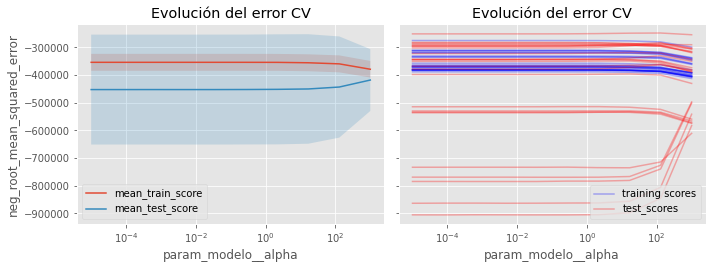

In [67]:
# Gráfico resultados validación cruzada para cada hiperparámetro
# ==============================================================================
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 3.84), sharey=True)

# Gráfico 1
# ------------------------------------------------------------------------------
resultados.plot('param_modelo__alpha', 'mean_train_score', ax=axes[0])
resultados.plot('param_modelo__alpha', 'mean_test_score', ax=axes[0])
axes[0].fill_between(resultados.param_modelo__alpha.astype(np.float),
                resultados['mean_train_score'] + resultados['std_train_score'],
                resultados['mean_train_score'] - resultados['std_train_score'],
                alpha=0.2)
axes[0].fill_between(resultados.param_modelo__alpha.astype(np.float),
                resultados['mean_test_score'] + resultados['std_test_score'],
                resultados['mean_test_score'] - resultados['std_test_score'],
                alpha=0.2)
axes[0].legend()
axes[0].set_xscale('log')
axes[0].set_title('Evolución del error CV')
axes[0].set_ylabel('neg_root_mean_squared_error');

# Gráfico 2
# ------------------------------------------------------------------------------
numero_splits = grid.n_splits_

resultados.plot(
    x     = 'param_modelo__alpha',
    y     = [f'split{i}_train_score' for i in range(numero_splits)],
    alpha = 0.3,
    c     = 'blue', 
    ax    = axes[1]
)

resultados.plot(
    x     = 'param_modelo__alpha',
    y     = [f'split{i}_test_score' for i in range(numero_splits)],
    alpha = 0.3,
    c     = 'red', 
    ax    = axes[1]
)

axes[1].legend(
    (axes[1].get_children()[0], axes[1].get_children()[numero_splits]),
    ('training scores', 'test_scores')
)
axes[1].set_xscale('log')
axes[1].set_title('Evolución del error CV')
axes[1].set_ylabel('neg_root_mean_squared_error');

fig.tight_layout()

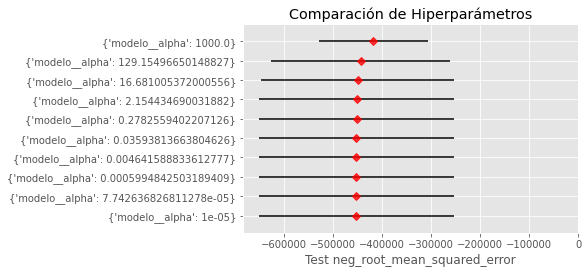

In [68]:
fig, ax = plt.subplots(figsize=(6, 3.84))
ax.barh(
    [str(d) for d in resultados['params']],
    resultados['mean_test_score'],
    xerr=resultados['std_test_score'],
    align='center',
    alpha=0
)
ax.plot(
    resultados['mean_test_score'],
    [str(d) for d in resultados['params']],
    marker="D",
    linestyle="",
    alpha=0.8,
    color="r"
)
ax.set_title('Comparación de Hiperparámetros')
ax.set_xlabel('Test neg_root_mean_squared_error');

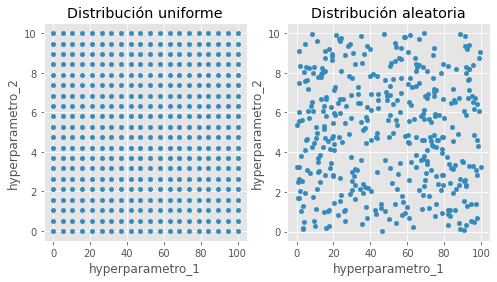

In [69]:

from itertools import product
import random

fig, axs = plt.subplots(nrows = 1, ncols = 2,figsize=(8, 4),
                        sharex = True, sharey = False)

# GRID EXHAUSTIVO
# ==============================================================================
hyperparametro_1 = np.linspace(start = 0, stop = 100, num=20)
hyperparametro_2 = np.linspace(start = 0, stop = 10, num=20)

# Lista con todas las combinaciones
combinaciones = [list(x) for x in product(hyperparametro_1, hyperparametro_2)]
combinaciones = pd.DataFrame.from_records(
                    combinaciones,
                    columns=['hyperparametro_1', 'hyperparametro_2']
                )

combinaciones.plot(
    x    = 'hyperparametro_1',
    y    = 'hyperparametro_2',
    kind = 'scatter',
    ax   = axs[0]
)
axs[0].set_title('Distribución uniforme')

# RANDOM GRID
# ==============================================================================
hyperparametro_1 = np.random.uniform(low = 0, high = 100, size  = 400)
hyperparametro_2 = np.random.uniform(low = 0, high = 10, size  = 400)

combinaciones = pd.DataFrame(
                    {
                    'hyperparametro_1': hyperparametro_1,
                    'hyperparametro_2': hyperparametro_2,
                    }
                )
combinaciones.plot(
    x    = 'hyperparametro_1',
    y    = 'hyperparametro_2',
    kind = 'scatter',
    ax   = axs[1]
)
axs[1].set_title('Distribución aleatoria');


In [ ]:
from sklearn.model_selection import RandomizedSearchCV, RepeatedKFold

# Espacio de búsqueda de cada hiperparámetro
# ==============================================================================
param_distributions = {'modelo__alpha': np.logspace(-5, 3, 100)}

# Búsqueda por validación cruzada
# ==============================================================================
grid = RandomizedSearchCV(
        estimator  = pipe,
        param_distributions = param_distributions,
        n_iter     = 50,
        scoring    = 'neg_root_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits = 5, n_repeats = 5), 
        verbose    = 0,
        random_state = 123,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)

# Resultados del grid
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False)\
    .head(1)



In [ ]:
from sklearn.model_selection import RandomizedSearchCV, RepeatedKFold
from sklearn.linear_model import Ridge

# Pipeline: preprocesado + modelo
# ==============================================================================
# Identificación de columnas numéricas y catégoricas
numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()


# Transformaciones para las variables numéricas
numeric_transformer = Pipeline(
                        steps=[('scaler', StandardScaler())]
                      )

# Transformaciones para las variables categóricas
categorical_transformer = Pipeline(
                            steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))]
                          )

preprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, numeric_cols),
                        ('cat', categorical_transformer, cat_cols)
                    ],
                    remainder='passthrough'
                )

# Se combinan los pasos de preprocesado y el modelo en un mismo pipeline.
pipe = Pipeline([('preprocessing', preprocessor),
                 ('modelo', Ridge())])

# Optimización de hiperparámetros
# ==============================================================================
# Espacio de búsqueda de cada hiperparámetro
param_distributions = {'modelo__alpha': np.logspace(-5, 5, 500)}

# Búsqueda random grid
grid = RandomizedSearchCV(
        estimator  = pipe,
        param_distributions = param_distributions,
        n_iter     = 20,
        scoring    = 'neg_root_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits = 5, n_repeats = 3), 
        refit      = True, 
        verbose    = 0,
        random_state = 123,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)

# Resultados del grid
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False)\
    .head(1)

In [ ]:


# Gráfico resultados validación cruzada para cada hiperparámetro
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 3.84))
hiperparametro = 'param_modelo__alpha'
resultados = resultados.sort_values(hiperparametro, ascending = False)
metrica    = grid.scoring

resultados.plot(hiperparametro, 'mean_train_score', ax=ax)
resultados.plot(hiperparametro, 'mean_test_score', ax=ax)
ax.fill_between(resultados[hiperparametro].astype(np.int),
                resultados['mean_train_score'] + resultados['std_train_score'],
                resultados['mean_train_score'] - resultados['std_train_score'],
                alpha=0.2)
ax.fill_between(resultados[hiperparametro].astype(np.int),
                resultados['mean_test_score'] + resultados['std_test_score'],
                resultados['mean_test_score'] - resultados['std_test_score'],
                alpha=0.2)
ax.legend()
ax.set_title('Evolución del error CV')
ax.set_ylabel(metrica);



In [ ]:
datos_sin_outliers.columns